## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

# Pre - Requisites

## Objecive:

To learn Ridge and Lasso Regression in Practical.

Since this requires a regression problem, our target variable will change.

`Target = Fire Weather Index`

## Importing Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

# Customizing plot parameters
plt.rcParams.update({
    'axes.facecolor': 'black',   # Background color of the axes
    'axes.edgecolor': 'white',   # Color of the axes edge
    'axes.labelcolor': 'white',  # Color of the axes labels
    'xtick.color': 'white',      # Color of the x-axis tick labels
    'ytick.color': 'white',      # Color of the y-axis tick labels
    'grid.color': 'gray',        # Color of the grid lines
    'text.color': 'white',       # Color of text
    'figure.facecolor': 'black', # Background color of the figure
    'figure.edgecolor': 'black'  # Edge color of the figure
})

import os
pd.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [5]:
dataset.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Pre - Processing

## Data Cleaning

In [5]:
# Missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is convereted into two sets based on Region from 122 index, we can make a new column to indicate the regions.

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [6]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1

In [7]:
df=dataset.copy()

In [8]:
df['Region'].value_counts()

Region
1.0    124
0.0    122
Name: count, dtype: int64

In [9]:
df['Region']=df['Region'].astype(int)

In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [11]:
# Removing the null row as it won't be affect the dataset that much
df=df.dropna().reset_index(drop=True) # dropping index to have uniform index to  the dataset

In [12]:
df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [13]:
# Since the data is divided into two parts from index 122, we might find another set of headers at the index
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
df.drop(index=122,inplace=True)

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
# Formatiing the columns for ease
df.columns=df.columns.str.strip()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.4+ KB


In [18]:
## Changing the required columns as interger data types

df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.4+ KB


In [20]:
# Changing the other columns to float type.
objects=df.select_dtypes('O').columns

In [21]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [23]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## Exploratory Data Analysis

In [24]:
## drop day,month and year
# To focus on the other important variables.
df_copy=df.drop(['day','month','year'],axis=1)

In [25]:
df_copy[['Region','Classes']].value_counts()

Region  Classes      
1       fire             78
0       not fire         60
        fire             53
1       not fire         41
0       fire              4
        fire              2
        not fire          2
        not fire          1
1       not fire          1
        not fire          1
Name: count, dtype: int64

Indicates maximum fires in the second region

In [26]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

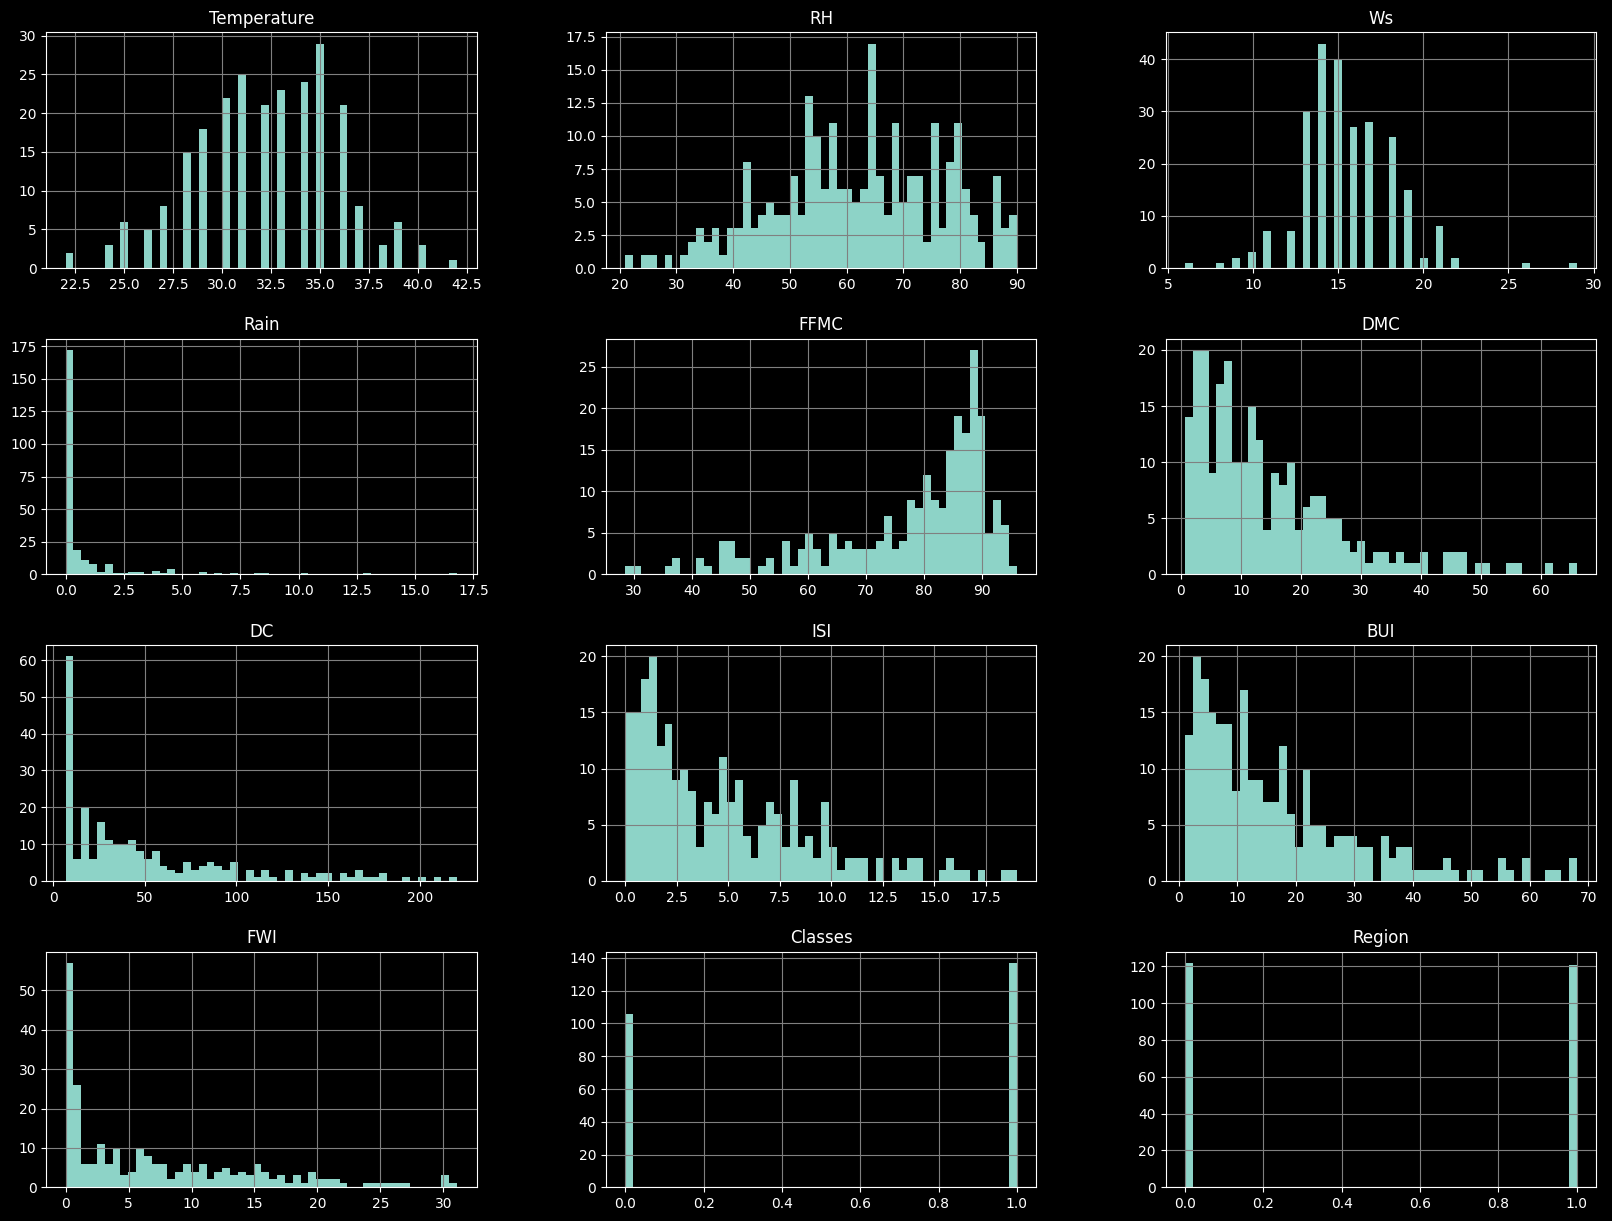

In [27]:
# Plotting histogram of all the remaining variables
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

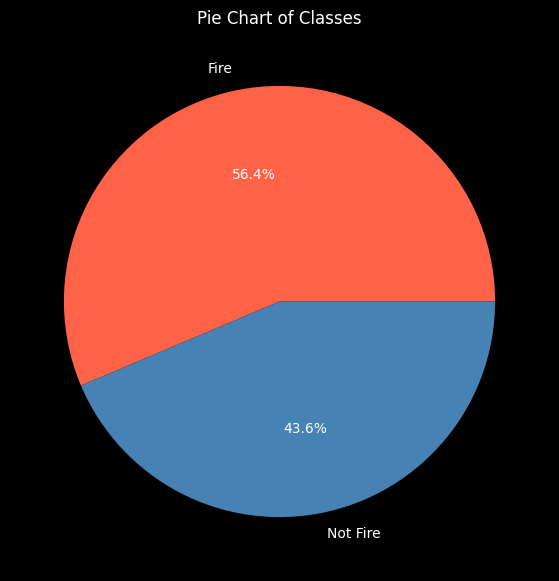

In [28]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%',colors= ["#FF6347", "#4682B4"] )
plt.title("Pie Chart of Classes")
plt.show()

In [29]:
# Let's find the correlation to see the signs of Multicollinearity
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

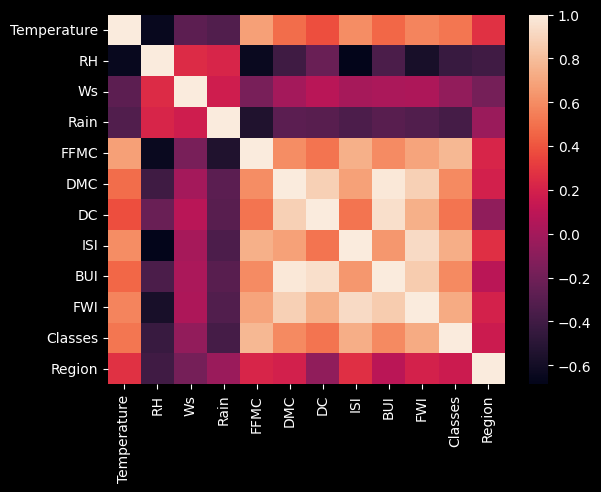

In [30]:
sns.heatmap(df_copy.corr())

[]

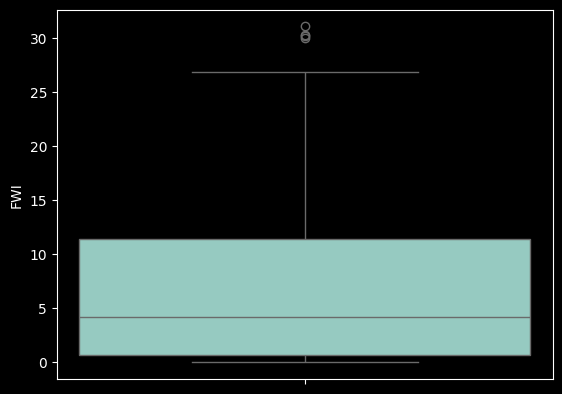

In [31]:
## Box Plot

sns.boxplot(df_copy['FWI'])
plt.plot()

Not many outliers

In [32]:
## Encoding of the categories in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

[]

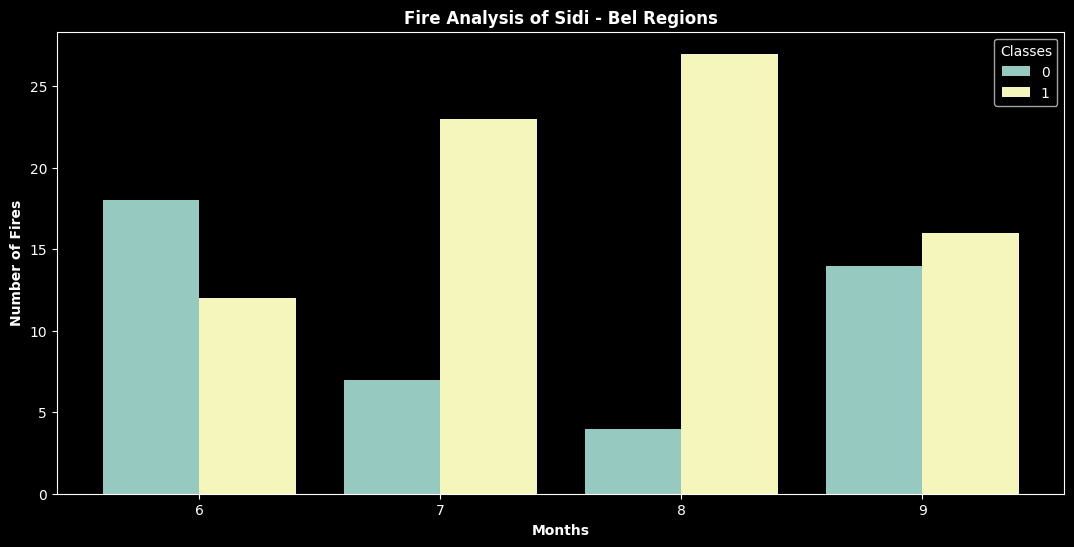

In [33]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire Analysis of Sidi - Bel Regions',weight='bold')
plt.plot()

[]

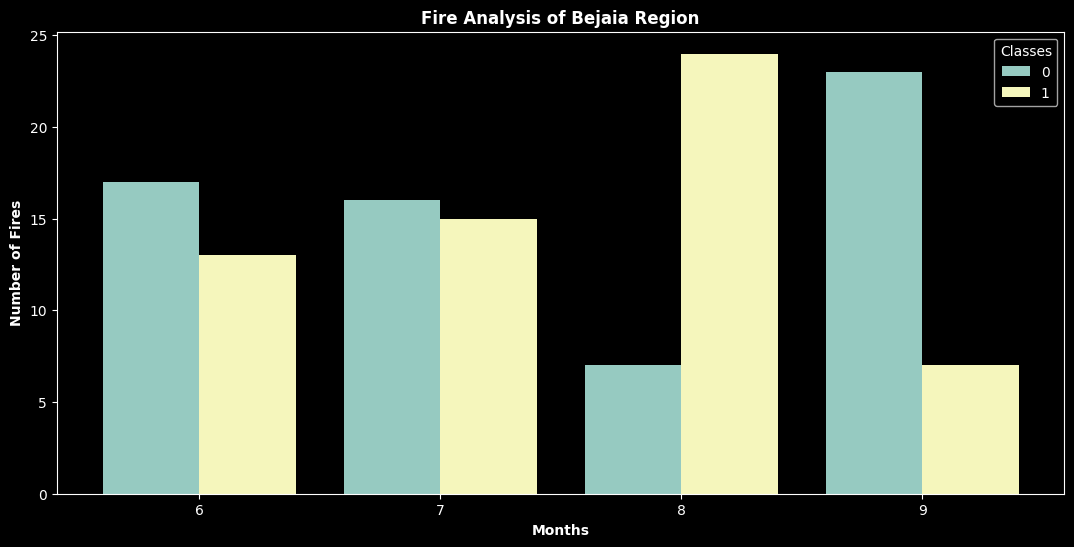

In [34]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire Analysis of Bejaia Region',weight='bold')
plt.plot()

Its observed that August and September had the most number of forest fires for both regions and from the above plot of months, we can understand few things.


Most of the fires happened in August and very high fires happened in only 3 months - June, July and August

Less fires were observed in September

## Feature Selection

In [35]:

df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0


In [36]:
# Dropping not usable features.
df.drop(['day','month','year'],axis=1,inplace=True)

In [37]:
df.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 24.7 KB


In [39]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [40]:
## Independent and Dependent Features.
X = df.drop('FWI',axis=1)
y = df['FWI']

In [41]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=123)

In [42]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [43]:
## Feature selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.634889,-0.271677,-0.363526,0.694130,0.477861,0.390993,0.620918,0.459550,0.547210,0.290126
RH,-0.634889,1.000000,0.239060,0.232944,-0.651615,-0.395187,-0.251614,-0.701021,-0.352418,-0.423158,-0.412274
Ws,-0.271677,0.239060,1.000000,0.154594,-0.188066,-0.040063,0.018759,-0.040310,-0.020758,-0.093881,-0.127584
Rain,-0.363526,0.232944,0.154594,1.000000,-0.588733,-0.339687,-0.347072,-0.394629,-0.350955,-0.427761,-0.018450
FFMC,0.694130,-0.651615,-0.188066,-0.588733,1.000000,0.607308,0.545630,0.754489,0.603355,0.783325,0.250519
DMC,0.477861,-0.395187,-0.040063,-0.339687,0.607308,1.000000,0.886592,0.687505,0.985484,0.607535,0.243110
DC,0.390993,-0.251614,0.018759,-0.347072,0.545630,0.886592,1.000000,0.557663,0.950385,0.580240,0.006096
ISI,0.620918,-0.701021,-0.040310,-0.394629,0.754489,0.687505,0.557663,1.000000,0.656893,0.746421,0.286046
BUI,0.459550,-0.352418,-0.020758,-0.350955,0.603355,0.985484,0.950385,0.656893,1.000000,0.614162,0.160549
Classes,0.547210,-0.423158,-0.093881,-0.427761,0.783325,0.607535,0.580240,0.746421,0.614162,1.000000,0.177123


[]

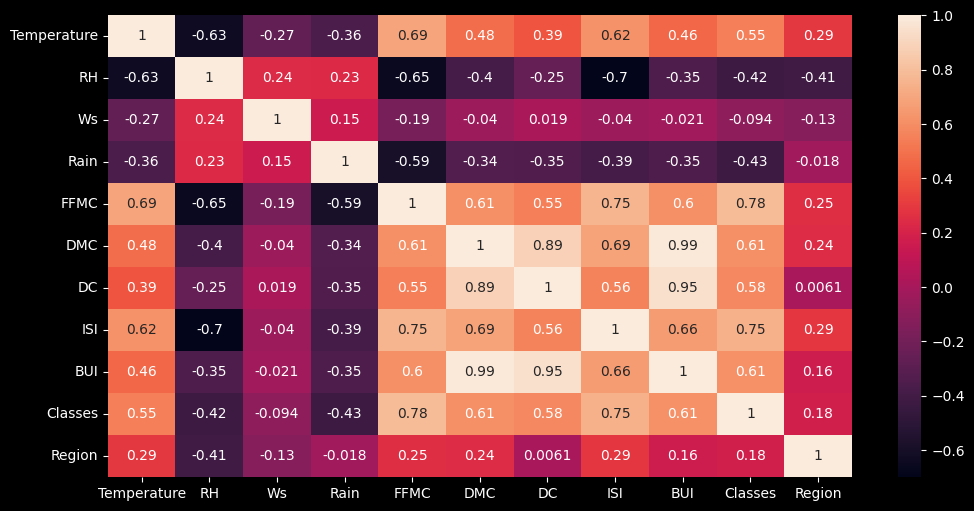

In [44]:
##-- Checks for Multi Collinearity

plt.figure(figsize=(12,6))
corr=X_train.corr()
sns.heatmap(corr, annot=True)
plt.plot()

In [45]:
def correlationn(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [46]:
## Threshold -- Set by Domain Expertise
to_drop=correlationn(X_train,0.85)

In [47]:
# Drop Featues when Correlationis more than 0.85
X_train.drop(to_drop,axis=1,inplace=True)
X_test.drop(to_drop,axis=1,inplace=True)

In [48]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Box Plots to under effects of Standard Scaler**

[]

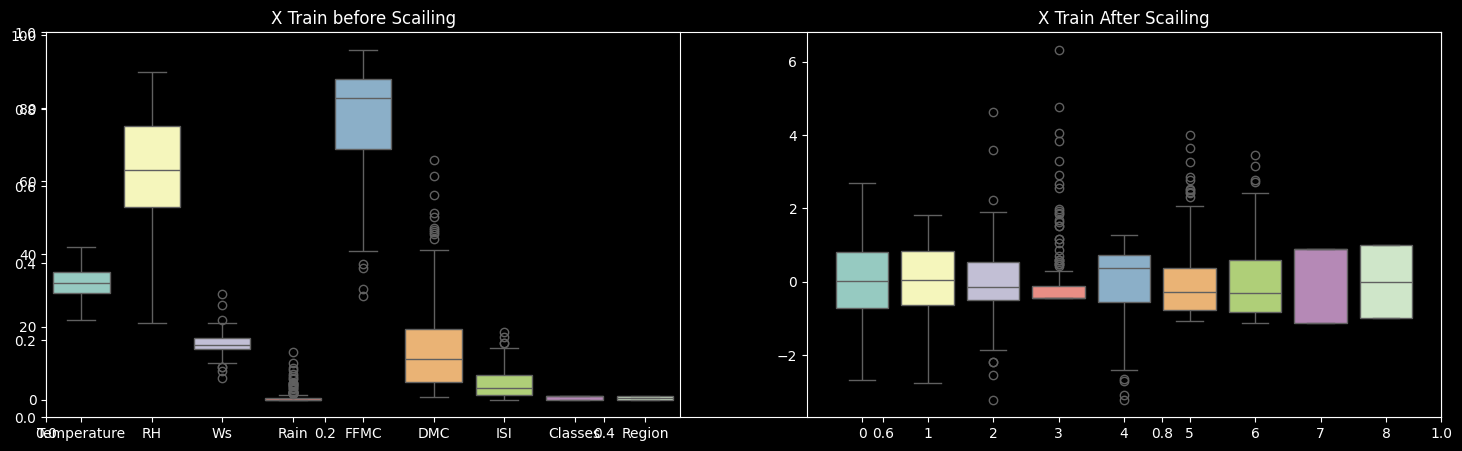

In [50]:
plt.subplots(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X Train before Scailing')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X Train After Scailing')
plt.plot()

# Model Training

## Linear Regression Model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)


In [54]:
print('Mean Absolute Error :',mae)
print('R2 Score',score)

Mean Absolute Error : 0.8278441843025754
R2 Score 0.9194401589196625


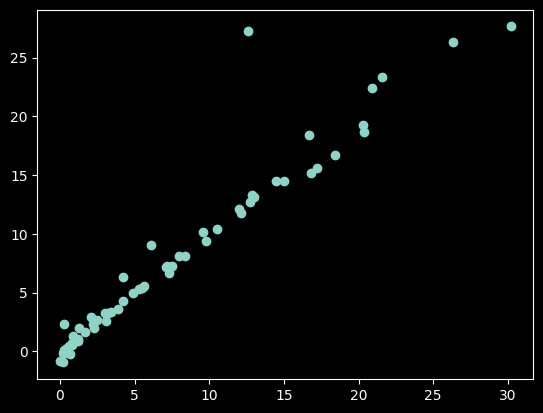

In [56]:
plt.scatter(y_test,y_pred)
plt.show()

There is a high chance that the Linear Regression might have overfit the data. Let's try to regularize the model

## Lasso Regression

Mean Absolute Error : 1.3935945979183544
R2 Score 0.9110837170928284


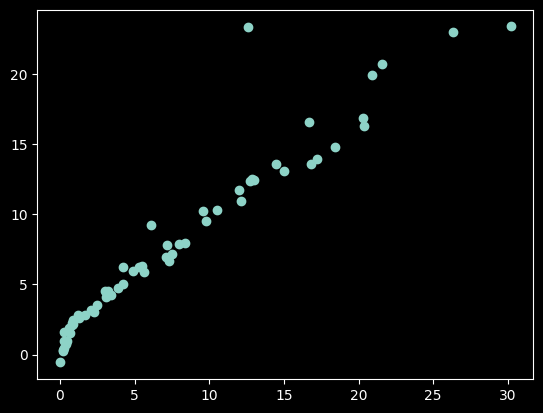

In [59]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error :',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)
plt.show()

## Ridge Regression

Mean Absolute Error : 0.8273900942395437
R2 Score 0.9217455710499128


[]

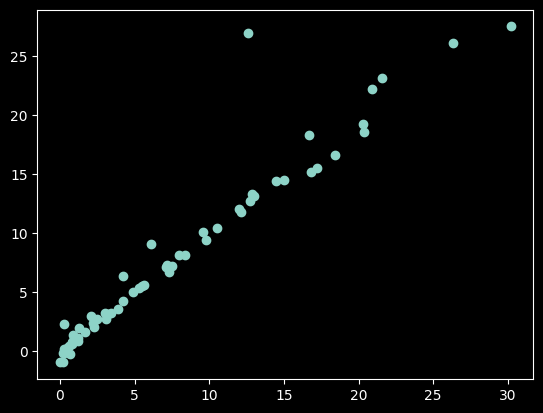

In [61]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error :',mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)
plt.plot()

## Elastic Net Regression

Mean Absolute Error : 1.9742443909196232
R2 Score 0.8641188883471218


[]

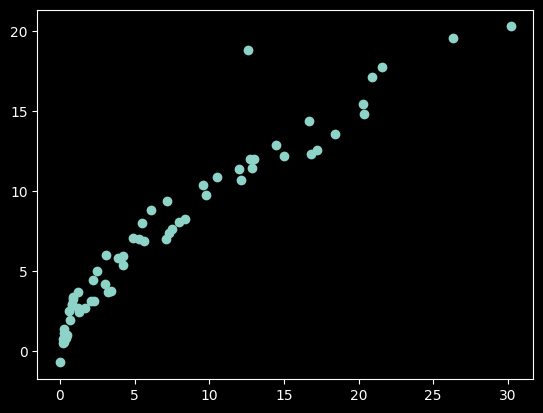

In [62]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error :',mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)
plt.plot()

# Hyper Parameter Tuning

In [86]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=10)
lassocv.fit(X_train_scaled,y_train)

print('Best alpha value: ',lassocv.alpha_)

Best alpha value:  0.012134564772964493


In [87]:
lassocv.alphas_[:5] # All the alphas for which the Lasso Regression was conducted.

array([6.9438441 , 6.47585225, 6.03940148, 5.63236604, 5.25276342])

In [88]:
lassocv.mse_path_[:2] # All the Mean Square values calculated.
# For each alphas MSE was calculated for 5 Cross validation sets

array([[ 61.98587705, 109.17854849,  55.05712736,  62.85032586,
         64.86497112,  32.39178124,  28.98599931,  25.38625504,
         68.09538258,  37.03786801],
       [ 59.22410858, 109.17854849,  50.18058167,  56.98556132,
         60.24359792,  28.4715867 ,  25.01851239,  22.11185066,
         62.13556368,  33.18079561]])

In [89]:
# We can confirm this by oobserving the shape of Lasso mse path
lassocv.mse_path_.shape

(100, 10)

Mean Absolute Error : 0.8239419539841297
R2 Score 0.9201609299879651


[]

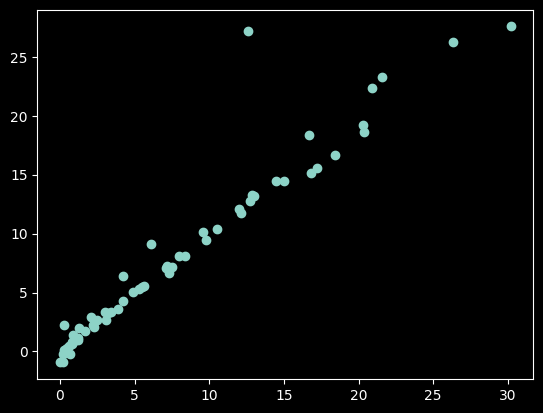

In [94]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error :',mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)
plt.plot()

Mean Absolute Error : 0.8273900942395437
R2 Score 0.9217455710499128


[]

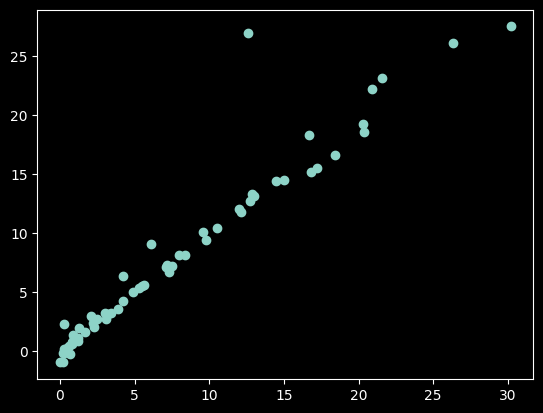

In [96]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
# If CV is not provided it will use Leave-One Out validation.
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error :',mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)
plt.plot()

In [97]:
ridgecv.alphas

(0.1, 1.0, 10.0)

Mean Absolute Error : 0.824337020862501
R2 Score 0.9223175043647507


[]

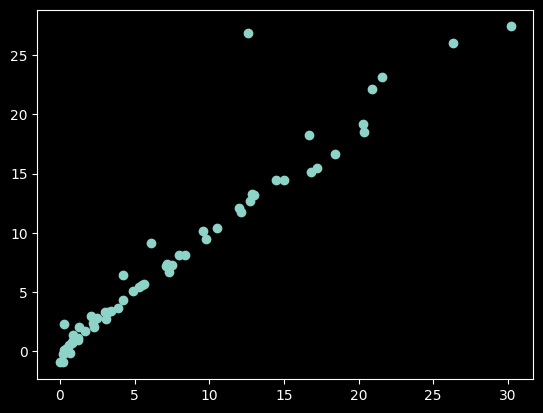

In [98]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean Absolute Error :',mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)
plt.plot()

# Saving the Model

## Pickling 


Saving the pre - processing weights and the model (Elastic Net) in our case.

In [100]:
scaler # Pre - Processor

StandardScaler()

In [102]:
elasticcv # Main Model

ElasticNetCV(cv=5)

In [103]:
import os
os.mkdir('Model_Repository')

In [104]:
os.mkdir('Model_Repository/Algerian_Forest_Fires')

In [105]:
import pickle 
# Pre- Processing
pickle.dump(scaler,open('Model_Repository/Algerian_Forest_Fires/scaler.pkl','wb'))

# Model
pickle.dump(elasticcv,open('Model_Repository/Algerian_Forest_Fires/ElasticFMITarget.pkl','wb'))
